# NAME - GAURAV MAHESHWARI (INTERN AT THE SPARKS FOUNDATION)

### THE SPARKS FOUNDATION GRIP (Graduate Rotational Internship Program) June 2021 BATCH
## DATA SCIENCE AND BUSINESS ANALYTICS
### TASK 5:- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data sets
data_matches=pd.read_csv("matches.csv")
data_deliveries=pd.read_csv("deliveries.csv")

In [3]:
# View first five rows
data_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# View first five rows
data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# EDA of Dataset

In [5]:
# shape of datasets
print ('shape of matches data ',data_matches.shape)
print ('shape of deliveries data ',data_deliveries.shape)

shape of matches data  (756, 18)
shape of deliveries data  (179078, 21)


In [6]:
# Info of datasets
data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# Info of datasets
data_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
# check the missing values
data_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
# check the missing values
data_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
# statistical view of data
data_matches.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,756,NaN,NaN,NaN,1792.18,3464.48,1,189.75,378.5,567.25,11415
season,756,NaN,NaN,NaN,2013.44,3.3669,2008,2011,2013,2016,2019
city,749,32,Mumbai,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,756,546,2009-04-27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team1,756,15,Mumbai Indians,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team2,756,15,Kolkata Knight Riders,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_winner,756,15,Mumbai Indians,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_decision,756,2,field,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result,756,3,normal,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dl_applied,756,NaN,NaN,NaN,0.0251323,0.15663,0,0,0,0,1


In [11]:
# statistical view of data
data_deliveries.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
match_id,179078,NaN,NaN,NaN,1802.25,3472.32,1,190,379,567,11415
inning,179078,NaN,NaN,NaN,1.48295,0.502074,1,1,1,2,5
batting_team,179078,15,Mumbai Indians,22619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowling_team,179078,15,Mumbai Indians,22517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over,179078,NaN,NaN,NaN,10.1625,5.67768,1,5,10,15,20
ball,179078,NaN,NaN,NaN,3.61559,1.80697,1,2,4,5,9
batsman,179078,516,V Kohli,4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_striker,179078,511,SK Raina,4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowler,179078,405,Harbhajan Singh,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_super_over,179078,NaN,NaN,NaN,0.000452317,0.021263,0,0,0,0,1


# Visualization of Dataset

Text(0.5, 0, 'Season')

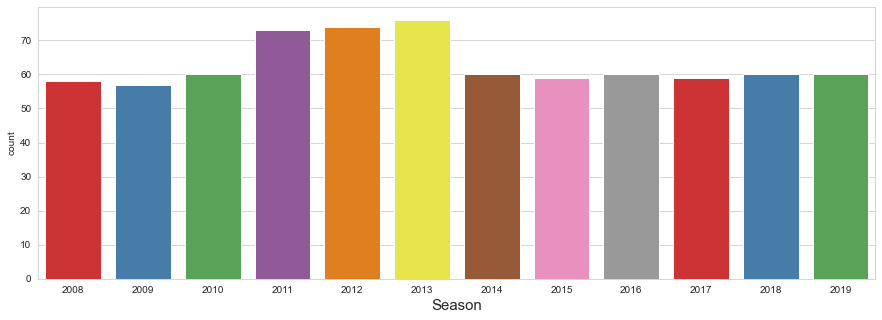

In [12]:
# Number of matched played in each season 
plt.figure(figsize=(15,5)) 
sns.countplot(x='season',data=data_matches,palette='Set1')
plt.xlabel('Season',fontsize=15)

Text(0.5, 0, 'Venue')

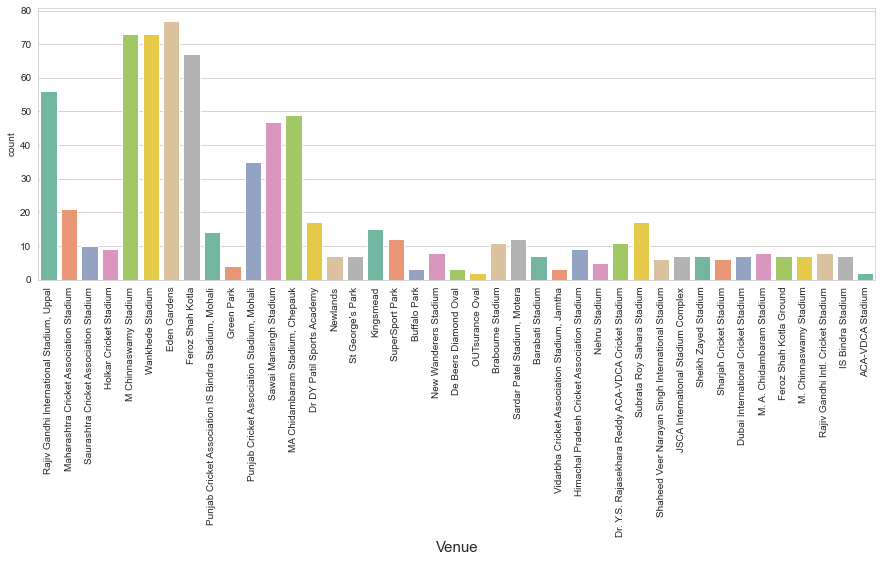

In [13]:
# No. of matched played in each stadium
plt.figure(figsize=(15,5)) 
plt.xticks (rotation=90)
sns.countplot(x='venue',data=data_matches,palette='Set2')
plt.xlabel('Venue',fontsize=15)

Text(0.5, 0, 'Winner')

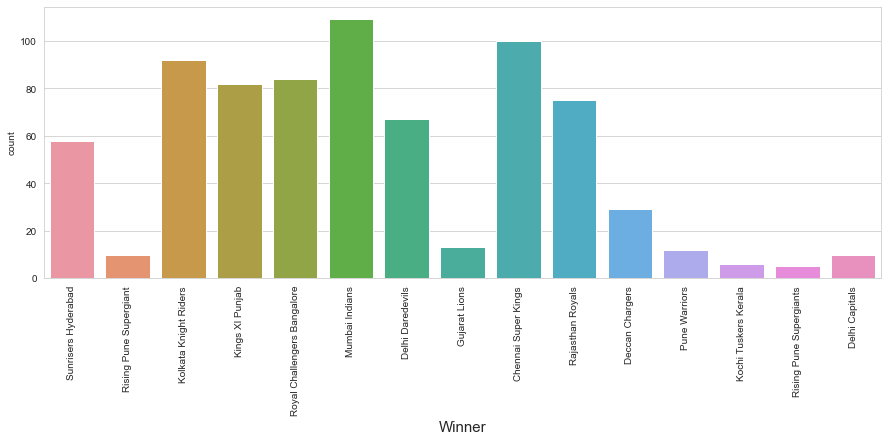

In [14]:
# Matches won by each team
plt.figure(figsize=(15,5)) 
plt.xticks (rotation=90)
sns.countplot(x='winner',data=data_matches)
plt.xlabel('Winner',fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'S Dhawan'),
  Text(4, 0, 'G Gambhir'),
  Text(5, 0, 'RV Uthappa'),
  Text(6, 0, 'DA Warner'),
  Text(7, 0, 'MS Dhoni'),
  Text(8, 0, 'AM Rahane'),
  Text(9, 0, 'CH Gayle'),
  Text(10, 0, 'AB de Villiers'),
  Text(11, 0, 'KD Karthik'),
  Text(12, 0, 'AT Rayudu'),
  Text(13, 0, 'SR Watson'),
  Text(14, 0, 'PA Patel'),
  Text(15, 0, 'MK Pandey'),
  Text(16, 0, 'YK Pathan'),
  Text(17, 0, 'JH Kallis'),
  Text(18, 0, 'BB McCullum'),
  Text(19, 0, 'Yuvraj Singh'),
  Text(20, 0, 'M Vijay'),
  Text(21, 0, 'SR Tendulkar'),
  Text(22, 0, 'KA Pollard'),
  Text(23, 0, 'R Dravid'),
  Text(24, 0, 'SE Marsh')])

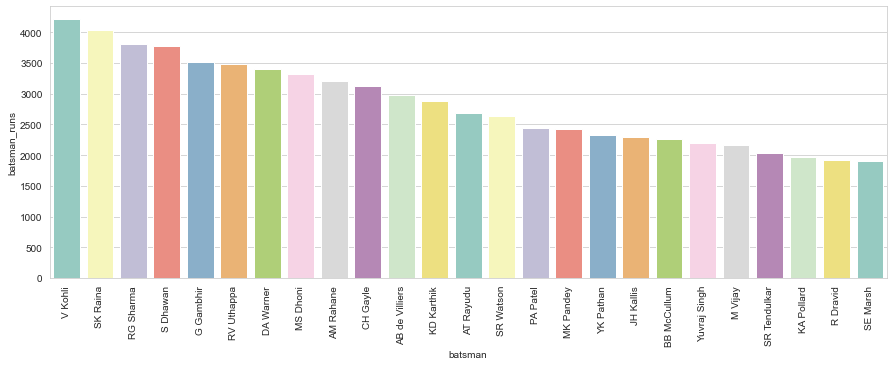

In [15]:
# Batsman who scored highest run in IPL
plt.figure(figsize=(15,5))
df_run = data_deliveries['batsman'].value_counts().reset_index()
df_run.columns = ['batsman','batsman_runs']
sns.barplot(x = 'batsman',y = 'batsman_runs', data = df_run[:25], palette = 'Set3')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

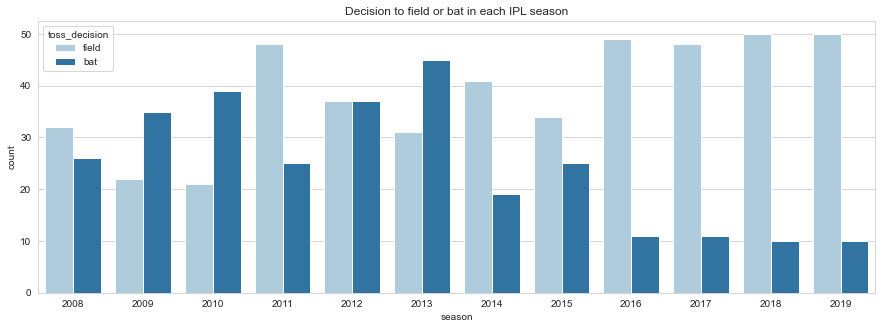

In [16]:
# Toss Decision to field or bat in each IPL season
plt.subplots(figsize=(15,5))
sns.countplot(x='season',hue='toss_decision',data=data_matches ,palette=sns.color_palette("Paired"))
plt.title("Decision to field or bat in each IPL season")

Text(0, 0.5, 'count')

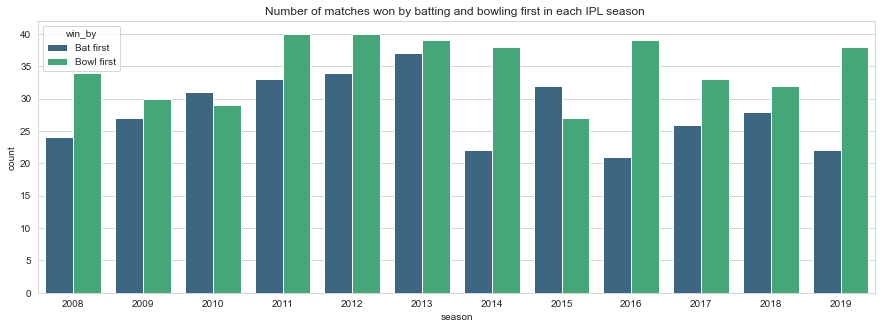

In [17]:
# Number of matches won by batting and bowling first in each IPL season
data_matches['win_by']=np.where(data_matches['win_by_runs']>0,'Bat first','Bowl first')
plt.figure(figsize = (15,5))
sns.countplot('season',hue='win_by', data=data_matches, palette="viridis")
plt.title("Number of matches won by batting and bowling first in each IPL season ")
plt.xlabel("season")
plt.ylabel("count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'MS Dhoni'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey'),
  Text(10, 0, 'AM Rahane'),
  Text(11, 0, 'V Kohli'),
  Text(12, 0, 'V Sehwag'),
  Text(13, 0, 'AD Russell'),
  Text(14, 0, 'DR Smith'),
  Text(15, 0, 'A Mishra'),
  Text(16, 0, 'KA Pollard'),
  Text(17, 0, 'JH Kallis'),
  Text(18, 0, 'SE Marsh'),
  Text(19, 0, 'AT Rayudu'),
  Text(20, 0, 'SP Narine'),
  Text(21, 0, 'UT Yadav'),
  Text(22, 0, 'RA Jadeja'),
  Text(23, 0, 'Harbhajan Singh'),
  Text(24, 0, 'SR Tendulkar')])

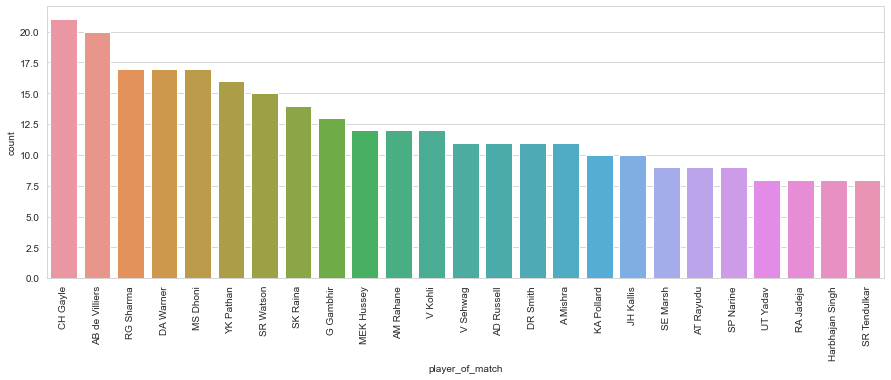

In [18]:
# Top player of the match
plt.figure(figsize=(15,5))
df_player = data_matches['player_of_match'].value_counts().reset_index()
df_player.columns = ['player_of_match','count']
sns.barplot(x = 'player_of_match',y = 'count', data = df_player[:25])
plt.xticks(rotation=90)

Text(0, 0.5, 'No. of fours')

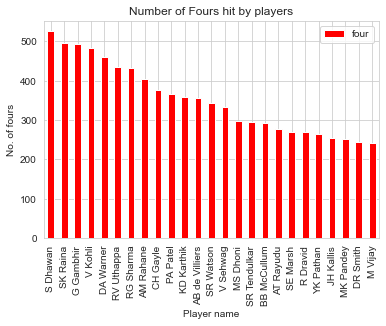

In [19]:
# Counts of fours hit by players 
data_4=data_deliveries[data_deliveries['batsman_runs']==4]
batsman_4=data_4.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_4.iloc[:25,:].plot('batsman','four',kind='bar',color='red')
plt.title("Number of Fours hit by players")
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No. of fours")

Text(0, 0.5, 'No. of six')

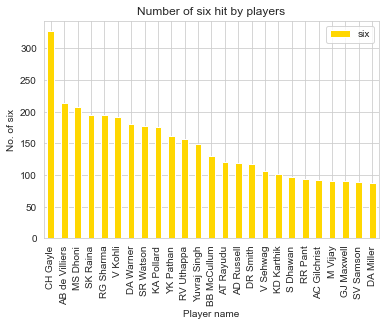

In [20]:
# Count of six hit by players 
data_6=data_deliveries[data_deliveries['batsman_runs']==6]
batsman_6=data_6.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_6.iloc[:25,:].plot('batsman','six',kind='bar',color='gold')
plt.title("Number of six hit by players")
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No. of six")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

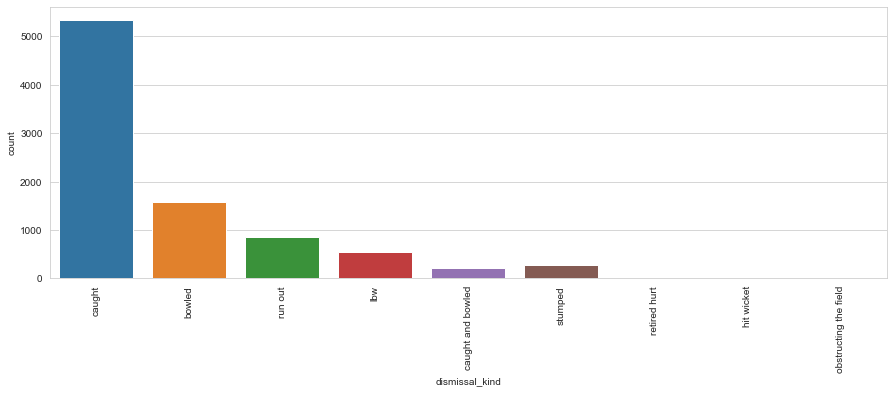

In [21]:
# Types of Dismissals in IPL
plt.figure(figsize=(15,5))
ax=sns.countplot(data_deliveries.dismissal_kind)
plt.xticks(rotation=90)

Text(0.5, 0, 'Umpires Name')

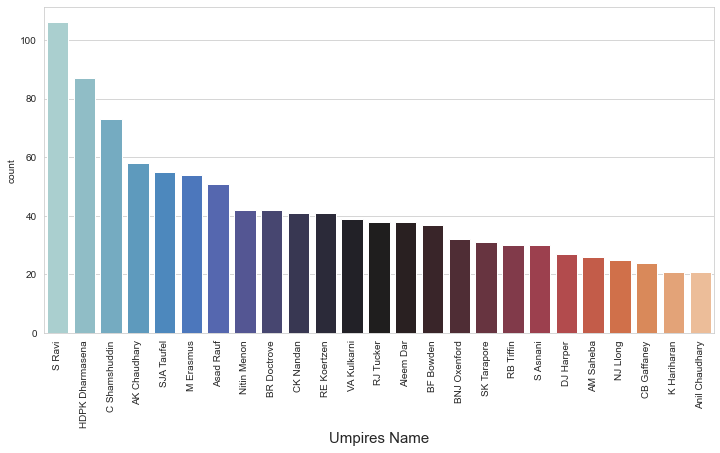

In [22]:
# Count of Umpires in IPL season
plt.figure(figsize=(12,6))
data_umpire = pd.DataFrame(pd.concat([data_matches['umpire1'], data_matches['umpire2']]),columns = ['count'])
umpire = data_umpire.apply(pd.value_counts)
sns.barplot(x = umpire[:25].index, y= umpire[:25]['count'], palette = "icefire")
plt.xticks(rotation=90)
plt.xlabel('Umpires Name',fontsize=15)